# PREPARACION DE DATOS / PREPROCESAMIENTO

## 1. Importación de Bibliotecas

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

### Cargando los datos

In [281]:
df = pd.read_csv("C:/Users/aprats/OneDrive - Fundacio privada quiropractica/VARIOS/AP Personal/ML/bank_dataset.CSV")

# Paso 1: Dividir el conjunto de datos

### División de los datos de la siguiente proporción: 80% entrenamiento, 20% prueba (esto se ve reflejado en el dato test_size=0.2)

In [285]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['deposit'])
y = df['deposit'] 

train_set, test_set, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [287]:
print(f"Conjunto de entrenamiento: {train_set.shape[0]} muestras")
print(f"Conjunto de prueba: {test_set.shape[0]} muestras")
print(f"Total de muestras: {train_set.shape[0] + test_set.shape[0]}")


Conjunto de entrenamiento: 8929 muestras
Conjunto de prueba: 2233 muestras
Total de muestras: 11162


# Paso: 2 Detección Outliers

#### Seleccionamos las columnas numéricas

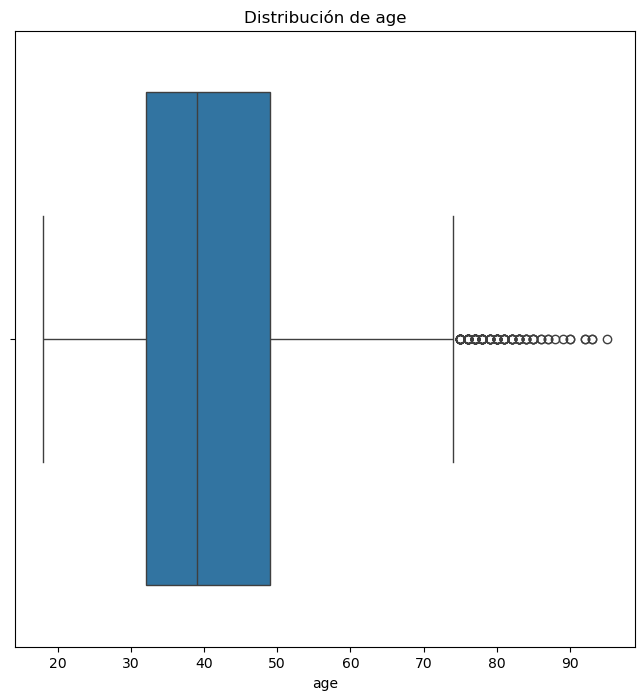

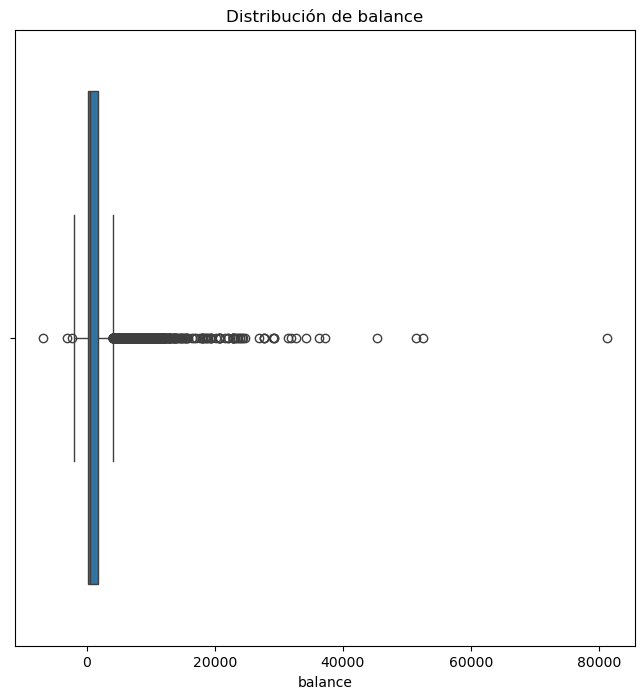

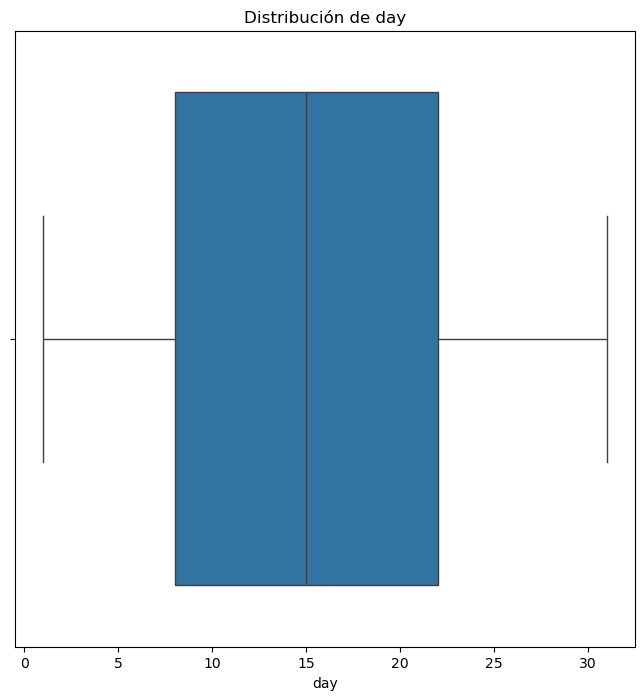

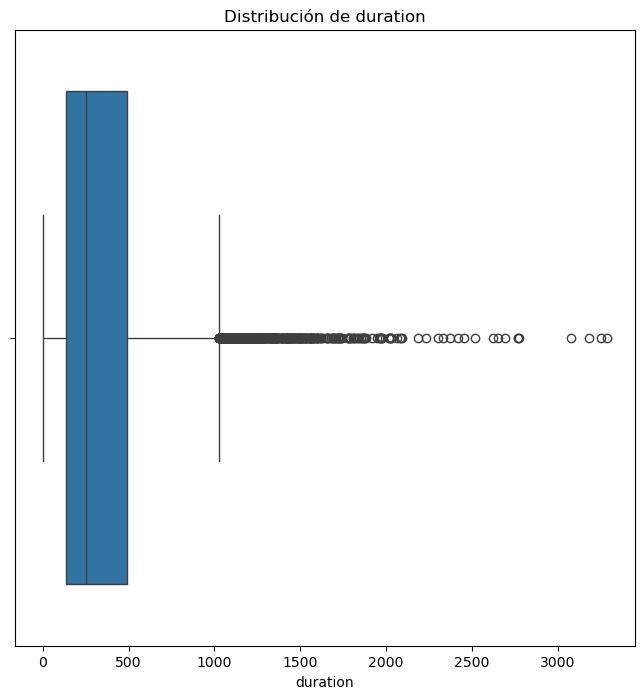

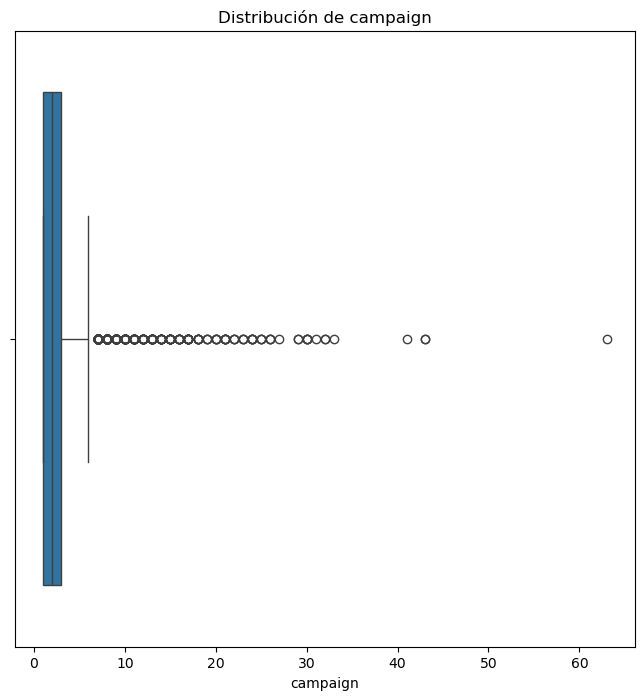

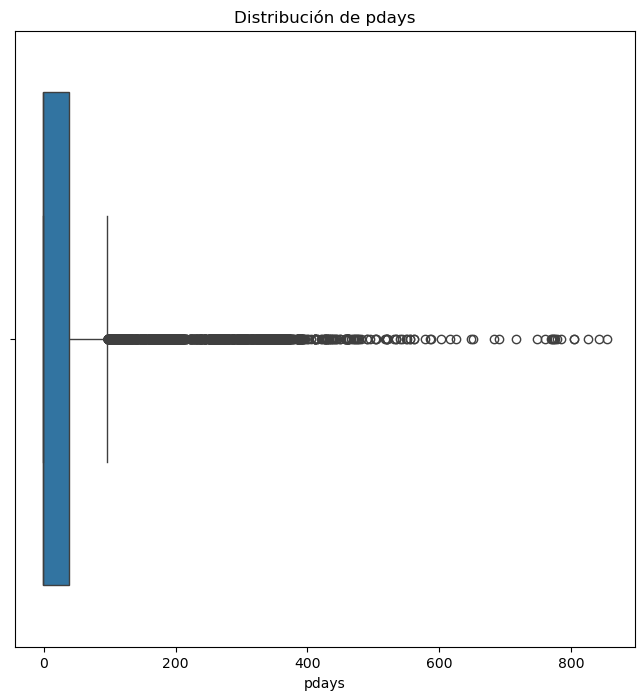

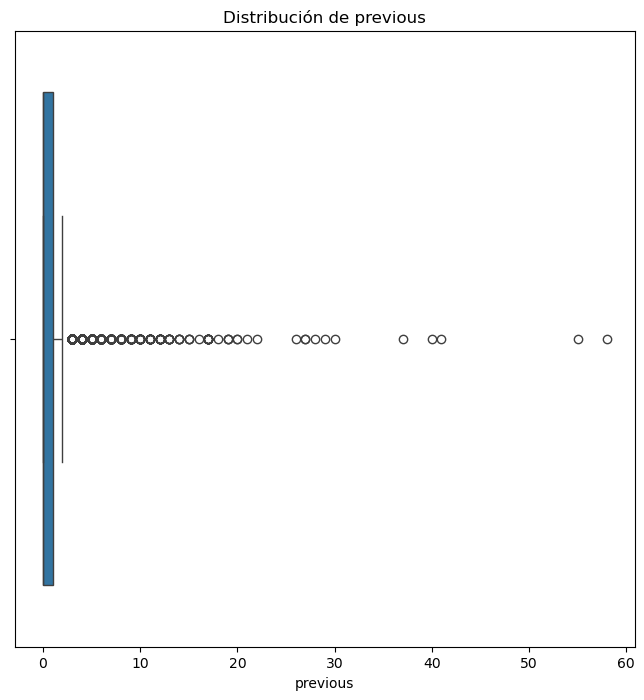

In [291]:
numerical_columns =train_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=train_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()


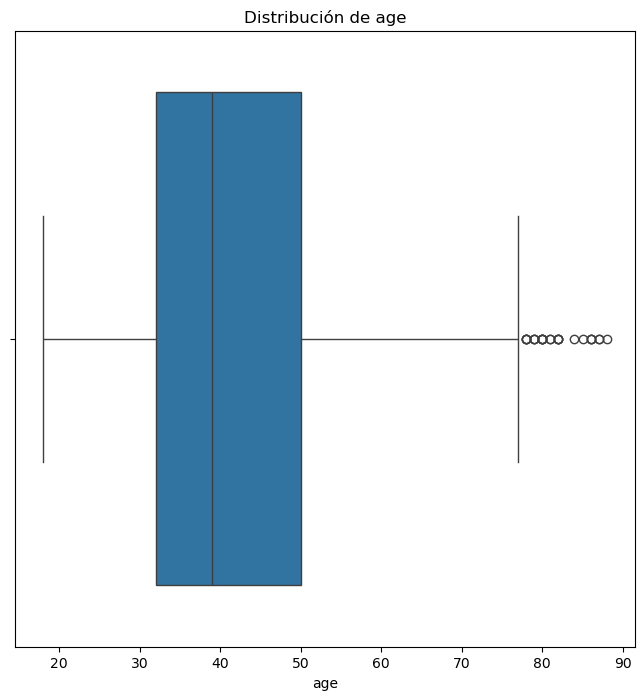

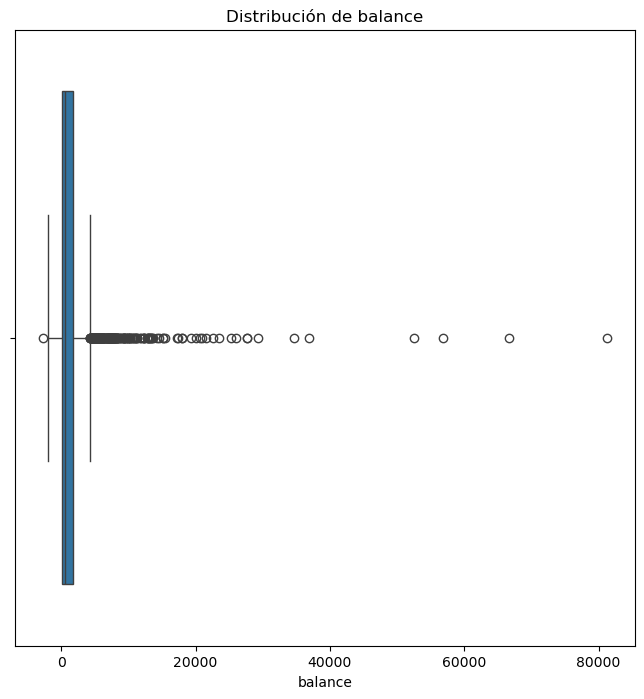

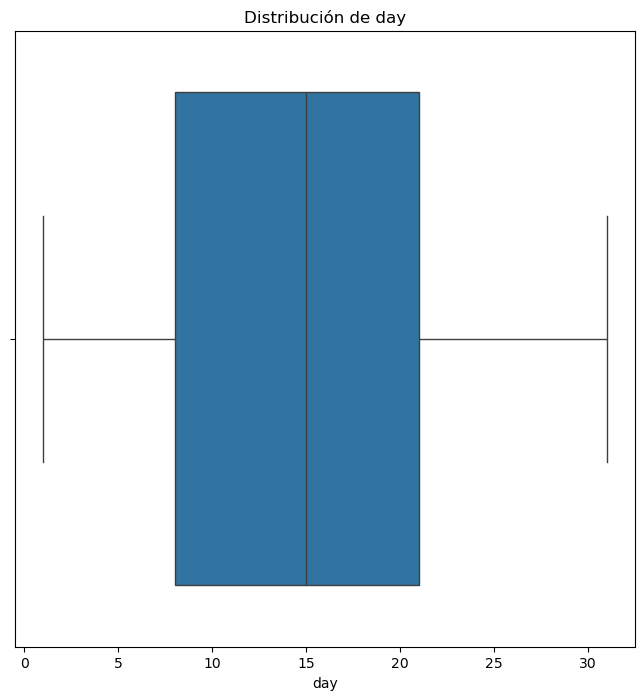

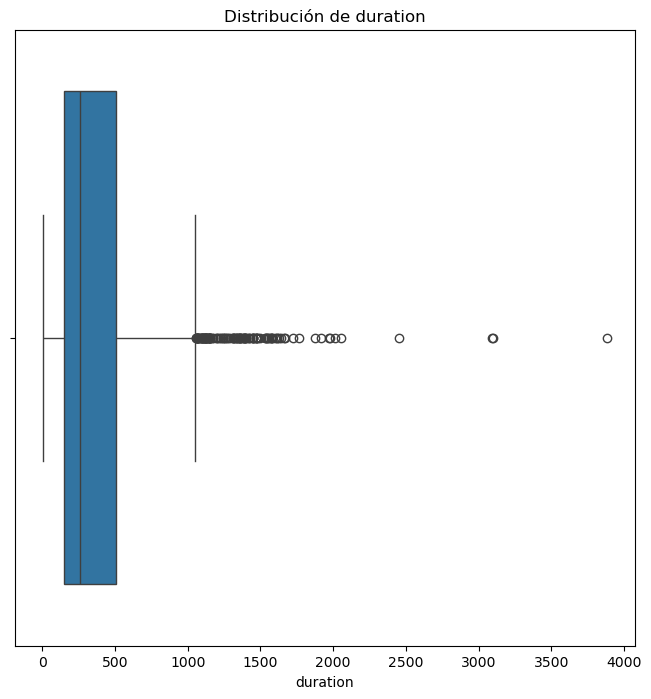

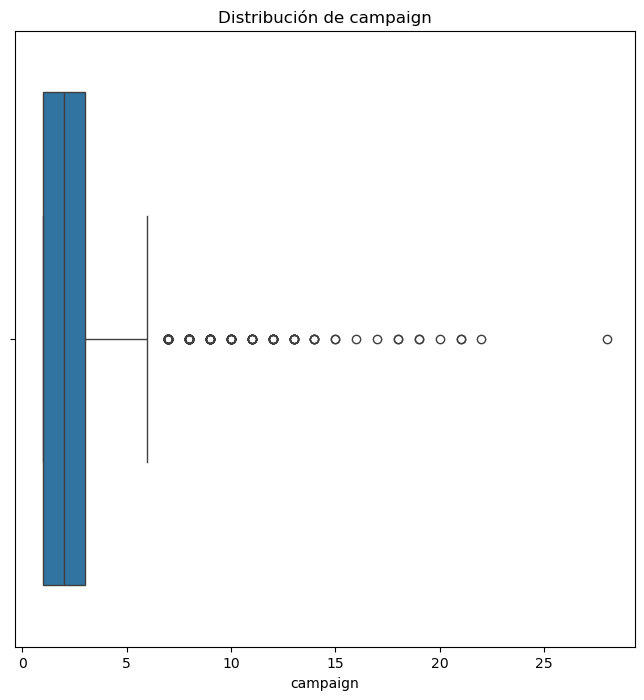

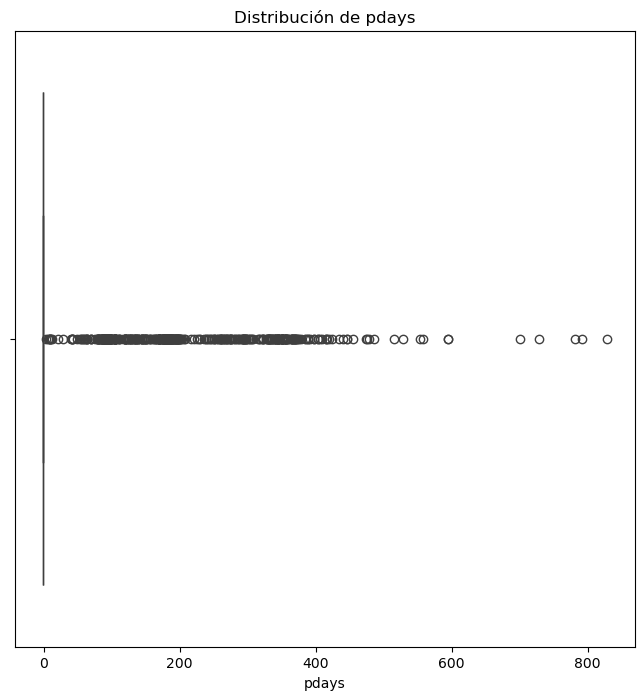

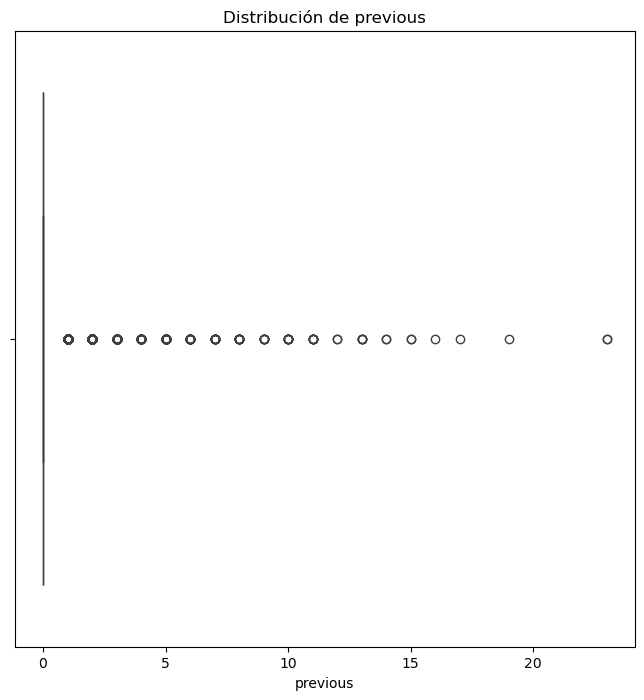

In [293]:
numerical_columns =test_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=test_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()

### Tratamiento de Outliers

#### Análisis de Resultado: en la variable *Age* se observan algunos valores atípicos, estos son menos extremos en comparación con otras variables. La edad se concentra entre los 30 y 50 años y a partir de los 70 hay algunos datos pero no son significativos, lo que determina que “age” tiene pocos outliers, por lo podría ser apropiado mantener los valores.
#### La variable *balance* tienen una significativa cantidad de outliers, esto podría ser relevante porque un balance muy alto podría influir en la desción del cliente, por loq ue se tratarán los ouliers de esta variable con winsorización

In [297]:
from scipy.stats.mstats import mquantiles

lower_limit, upper_limit = mquantiles(train_set['balance'], prob=[0.01, 0.99])

train_set['balance'] = train_set['balance'].clip(lower=lower_limit, upper=upper_limit)
test_set['balance'] = test_set['balance'].clip(lower=lower_limit, upper=upper_limit)



### Verificamos que no existen valores nulos, si lo hubiese se tendría que imputar los valores faltantes. Como previamente se realizó la deteccion y tratamientos de Ouliers, esta todo correcto.

In [300]:
print("Valores nulos por columna:")
print(train_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          7
balance      0
housing      0
loan         0
poutcome     0
education    6
dtype: int64


In [302]:
print("Valores nulos por columna:")
print(test_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          3
balance      0
housing      0
loan         0
poutcome     0
education    1
dtype: int64


In [304]:
print("\nValores faltantes en y_train:", y_train.isnull().sum())
print("Valores faltantes en y_test:", y_test.isnull().sum())



Valores faltantes en y_train: 0
Valores faltantes en y_test: 0


# Paso 3: Imputación de valores faltantes

### Contar Valores nulos por columnas en ambos conjuntos

In [308]:
print("Valores faltantes en el conjunto de entrenamiento:")
train_set.isnull().sum()

Valores faltantes en el conjunto de entrenamiento:


age          7
job          0
marital      4
education    6
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [310]:
print("Valores faltantes en el conjunto de prueba:")
test_set.isnull().sum()

Valores faltantes en el conjunto de prueba:


age          3
job          0
marital      1
education    1
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Imputacion de valores faltantes, media para la 'age' ya que los valores extremos no son muy considerables, moda para 'education' ya que es una variable categorica, dejamos igual el valor en 'marital' ya que será una valor que no usaremos y a futuro desistimaremos de nuestro DataFrame.
Esta imputación se realizará en ambos conjuntos

### Gestión de Valores Faltantes

In [314]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [316]:
education_mode = train_set['education'].mode()[0]
train_set['education'] = train_set['education'].fillna(education_mode)
test_set['education'] = test_set['education'].fillna(education_mode)

age_median = train_set['age'].median()
train_set['age'] = train_set['age'].fillna(age_median)
test_set['age'] = test_set['age'].fillna(age_median)


In [318]:
print("Valores faltantes en 'education' después de la imputación:")
print(train_set['education'].isnull().sum())
print(test_set['education'].isnull().sum())

print("\nValores faltantes en 'age' después de la imputación:")
print(train_set['age'].isnull().sum())
print(test_set['age'].isnull().sum())


Valores faltantes en 'education' después de la imputación:
0
0

Valores faltantes en 'age' después de la imputación:
0
0


##### Se verifica que no hay valores faltantes en las características imputadas

# Paso 3: Codificación de variables categóricas

#### En este paso, convertiré las variables categóricas en un formato numérico para que puedan ser utilizadas por los algoritmos de machine learning:

One-Hot Encoding: Para variables categóricas sin orden inherente.

Label Encoding: Para variables categóricas con un orden lógico.

#### Se Identifican las variables categóricas y según su caracteristica se trabajara la codificación.
#### Se aplica Label Encoding en 'housing', 'loan', por ser variables binarias, en cuanto a 'poutcome' y 'education', estas dos ultimas variables por no tener un orden implícito. al ser binarias, lo caul es más simple y eficiente, en cuanto a 'poutcome'  no es binario, sino una categoría multiple, pero podría tener un orden implícito por eso es más recomendable aplicar la misma codificacion de etiqueta y en 'education' One-Hot Encoding


In [324]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [326]:
from sklearn.preprocessing import LabelEncoder

In [328]:
for col in ['housing', 'loan', 'poutcome', 'education']:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])
    test_set[col] = le.transform(test_set[col]) 
    
print("Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.")


Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.


In [330]:
print(train_set.head())  

       age          job  marital  education default  balance  housing  loan  \
8644  46.0       admin.  married          1      no    526.0        0     1   
2632  46.0       admin.  married          2      no   2552.0        0     0   
3056  25.0   technician   single          1      no    139.0        0     1   
1080  43.0   technician  married          1      no   3288.0        1     0   
4006  37.0  blue-collar   single          3      no    217.0        0     0   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8644  cellular   31   jul       251         3     -1         0         3  
2632  cellular    3   sep       260         1     94         8         2  
3056  cellular   11   jan       202         1     91         1         2  
1080  cellular   21   nov       775         3     -1         0         3  
4006  cellular   23   sep       272         2     -1         0         3  


In [332]:
print(test_set.head())   

       age          job  marital  education default  balance  housing  loan  \
8220  32.0   management  married          2      no    393.0        0     0   
2521  36.0   technician   single          1      no    376.0        0     0   
7949  52.0       admin.  married          1      no    722.0        0     0   
7879  35.0   management   single          1     yes   -202.0        1     0   
616   41.0  blue-collar  married          1      no   -190.0        0     1   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8220  cellular   28   jan       458         2     -1         0         3  
2521  cellular   13   aug       479         1     -1         0         3  
7949  cellular   26   oct        99         2    185         3         0  
7879   unknown   20   may       268         3     -1         0         3  
616   cellular   29   jul       808         3     -1         0         3  


### Se eliminan las variables que no usaremos para evitar el ruido en el anáilisis y en el entrenamiento, ya que nuestro proyecto no considera estas variables deterinantes para el objetivo, esto se elimina en ambos conjuntos.

In [335]:

train_set = train_set.drop(columns=['marital', 'job', 'month','duration'])
test_set = test_set.drop(columns=['marital', 'job', 'month','duration'])



#### En cuanto a la característica 'deposit' al ser una variable objetivo se procede a convertirlo en información binaria, debido a su sencilles a la hora de su interprestación en ela predicción.

In [338]:
print(train_set.columns)
print(test_set.columns)


Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


#### Se procede a realizar a la variable 'deposit' una codificación binaria, pero como la columna deposit se separó de los conjuntos de datos de entrenamiento y de prueba se aplica a las variables objetivos en la dataset con estratificación

In [341]:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})


In [343]:
print(y_train.head())
print(y_test.head())


8644    0
2632    1
3056    1
1080    1
4006    1
Name: deposit, dtype: int64
8220    0
2521    1
7949    0
7879    0
616     1
Name: deposit, dtype: int64


# Paso 4: Estandarización

#### La estandarización asegura que todas las características numéricas tengan una media de 0 y una desviación estándar de 1. Esto es importante porque muchos algoritmos (por ejemplo, regresión logística, SVM, k-means) son sensibles a la escala de las características.

##### Se Identifica  las columnas numéricas para trabajar directamente con ellas, así aseguramos que estamos tomando todas las caracteristicas de nuesto DataFrame, de ambos conjuntos

In [368]:
from sklearn.preprocessing import StandardScaler

In [374]:
num_columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

train_set[num_columns] = scaler.fit_transform(train_set[num_columns])
test_set[num_columns] = scaler.transform(test_set[num_columns])


In [379]:
print("Media después de la estandarización (train_set):")
print(train_set[num_columns].mean())

print("\nDesviación estándar después de la estandarización (train_set):")
print(train_set[num_columns].std())


Media después de la estandarización (train_set):
age         2.785194e-18
balance    -1.114078e-17
campaign    1.909847e-17
pdays      -4.456310e-17
previous   -9.947121e-18
dtype: float64

Desviación estándar después de la estandarización (train_set):
age         1.000056
balance     1.000056
campaign    1.000056
pdays       1.000056
previous    1.000056
dtype: float64


#### Según este resultado las medias de las columnas son cercacnas al 0 y la desviación estándar cercana a 1

# Paso 5: Generación de Nuevas Características

##### Con la idea de mejorar el desempeño del modelo se determina generar nuevas características, ya que estas variables tienen impacto en el resultado objetivo 'deposit', así podremos simplificar el modelo y evitar sobreajuste.

##### tomo la cataegoria 'balance' y  'age' porque puede capturar relaciones relevantes entre la edad del cliente y su nivel financiero, esto ayudará a que el modelo interprete más facilmente diferencias cualitativas

In [385]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


In [387]:
train_set['balance_to_age_ratio'] = train_set['balance'] / train_set['age']
test_set['balance_to_age_ratio'] = test_set['balance'] / test_set['age']


In [389]:
print(train_set[['balance_to_age_ratio']].head())
print(test_set[['balance_to_age_ratio']].head())

      balance_to_age_ratio
8644             -0.941515
2632              1.239207
3056              0.412277
1080              5.255081
4006              1.516234
      balance_to_age_ratio
8220              0.582308
2521              1.055682
7949             -0.328059
7879              1.380892
616              76.448262


##### Categorizar 'balance' en rangos, esto solo se aplica

In [393]:
bins = [-float('inf'), 0, 1000, 5000, float('inf')]
labels = ['deuda', 'bajo', 'medio', 'alto']

train_set['balance_category'] = pd.cut(train_set['balance'], bins=bins, labels=labels)
test_set['balance_category'] = pd.cut(test_set['balance'], bins=bins, labels=labels)


##### Crear una nueva columna: ratio entre 'balance' y 'age'

###### Se aplica +1 para evitar divisiones por cero

In [397]:
train_set['balance_age_ratio'] = train_set['balance'] / (train_set['age'] + 1)  
test_set['balance_age_ratio'] = test_set['balance'] / (test_set['age'] + 1)


In [401]:
print(train_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())
print(test_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())


           age   balance balance_category  balance_age_ratio
8644  0.411944 -0.387852            deuda          -0.274693
2632  0.411944  0.510484             bajo           0.361547
3056 -1.356972 -0.559449            deuda           1.567206
1080  0.159242  0.836830             bajo           0.721877
4006 -0.346163 -0.524864            deuda          -0.802744
           age   balance balance_category  balance_age_ratio
8220 -0.767333 -0.446825            deuda          -1.920450
2521 -0.430397 -0.454362            deuda          -0.797682
7949  0.917349 -0.300945            deuda          -0.156959
7879 -0.514631 -0.710650            deuda          -1.464144
616  -0.009226 -0.705329            deuda          -0.711897


### PPCA

##### Debido a la baja dimensionalidad y inexistencia de multicolinealidad no se procede a realiazar PCA, esto evitará una complejidad innecesaria